▲リスト7.3：境界が不明瞭ながらも、2つの領域に分かれたデータ

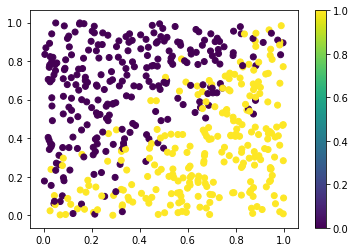

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

n_data = 500  # データ数
X = np.zeros((n_data, 2))  # 入力
T = np.zeros((n_data))  # 正解

for i in range(n_data):
    # x、y座標をランダムに設定する
    x_rand = np.random.rand()  # x座標
    y_rand = np.random.rand()  # y座標
    X[i, 0] = x_rand
    X[i, 1] = y_rand
    
    # xがyより大きい領域では正解ラベルを1にする。境界は正規分布を使って少しぼかす
    if x_rand > y_rand + 0.2*np.random.randn(): 
        T[i] = 1

plt.scatter(X[:, 0], X[:, 1], c=T)  # 正解ラベルを色で表す
plt.colorbar()
plt.show()

▲リスト7.4：ロジスティック回帰により、データを分類する

--- 確率分布 ---


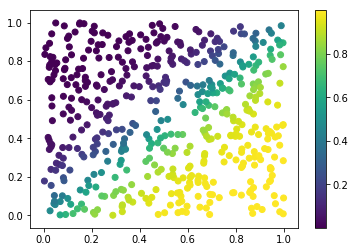

--- 誤差の推移 ---


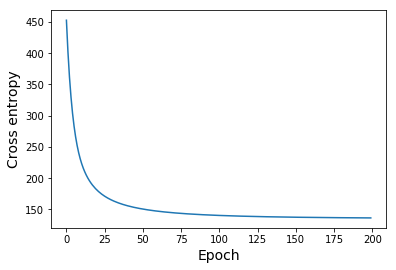

In [2]:
eta = 0.01  # 学習係数

# --- 出力を計算（分類を行う） ---
def classify(x, a_params, b_param):
    u = np.dot(x, a_params) + b_param  # （式 4）
    return 1/(1+np.exp(-u))  # （式 4）

# --- 交差エントロピー誤差 ---
def cross_entropy(Y, T):
    delta = 1e-7  # 微小な値
    return -np.sum(T*np.log(Y+delta) + (1-T)*np.log(1-Y+delta))  # （式 3）

# --- 各パラメータの勾配 ---
def grad_a_params(X, T, a_params, b_param):  # a1, a2, ...の勾配
    grad_a = np.zeros(len(a_params))
    for i in range(len(a_params)):    
        for j in range(len(X)):    
            grad_a[i] += ( classify(X[j], a_params, b_param) - T[j] )*X[j, i]  # （式 7）
    return grad_a
              
def grad_b_param(X, T, a_params, b_param):  # bの勾配
    grad_b = 0
    for i in range(len(X)):    
        grad_b += ( classify(X[i], a_params, b_param) - T[i] )  # （式 8）
    return grad_b

# --- 学習 ---
error_x = []  # 誤差の記録用
error_y = []  # 誤差の記録用
def fit(X, T, dim, epoch):  # dim: 入力の次元 epoch: 繰り返し回数
    
    # --- パラメータの初期値を設定 ---
    a_params = np.random.randn(dim)
    b_param = np.random.randn()
              
    # --- パラメータの更新 ---
    for i in range(epoch): 
        grad_a = grad_a_params(X, T, a_params, b_param)
        grad_b = grad_b_param(X, T, a_params, b_param)
        a_params -= eta * grad_a  # （式 2）
        b_param -= eta * grad_b  #（式 2）
        
        Y = classify(X, a_params, b_param)
        error_x.append(i)  # 誤差の記録
        error_y.append(cross_entropy(Y, T))  # 誤差の記録

    return (a_params, b_param)

# --- 確率分布の表示 --- 
a_params, b_param = fit(X, T, 2, 200)  # 学習
Y = classify(X, a_params, b_param)  # 学習後のパラメータを使用した分類
              
result_x = []  # x座標
result_y = []  # y座標
result_z = []  # 確率
for i in range(len(Y)):
    result_x.append(X[i, 0])
    result_y.append(X[i, 1])
    result_z.append(Y[i])

print("--- 確率分布 ---")
plt.scatter(result_x, result_y, c=result_z)  # 確率を色で表示
plt.colorbar()
plt.show()

# --- 誤差の推移 --- 
print("--- 誤差の推移 ---")
plt.plot(error_x, error_y)
plt.xlabel("Epoch", size=14)
plt.ylabel("Cross entropy", size=14)
plt.show()

#### □問題
　正解ラベルの境界を変更した上で、ロジスティック回帰のコードを実行してみましょう。

##### □解答例
　自身で想定した結果になっているかどうか確認してみましょう。